#AMORE

#First Phase

#Loading The Data

In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.1 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-nkvrn3hh
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-nkvrn3hh
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 853.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import torch
import clip
from PIL import Image
from tqdm import tqdm
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:12<00:00, 28.2MiB/s]


In [ ]:
import requests

url = "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train"
response = requests.get(url)
response.raise_for_status()

parquet_files = response.json()
parquet_files


['https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/0.parquet',
 'https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/1.parquet',
 'https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/2.parquet',
 'https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/3.parquet',
 'https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/4.parquet']

In [ ]:
import pandas as pd

# List of all Parquet URLs from the API
parquet_urls = [
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/0.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/1.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/2.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/3.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/4.parquet"
]

# Download and load each file into a DataFrame
dfs = []
for i, url in enumerate(parquet_urls):
    print(f"Downloading part {i}...")
    df_part = pd.read_parquet(url)
    dfs.append(df_part)

# Combine all parts into one DataFrame
df = pd.concat(dfs, ignore_index=True)
print(f"Loaded dataset with {len(df)} rows")
df.head()



Loaded dataset with 17375 rows


,file_name,text
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"Bracelet, Bracelet Body Metal, 14K Rose Gold"
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"Bracelet, Bracelet Body Metal, 14K Rose Gold"
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"Bracelet, Bracelet Body Metal, 14K Rose Gold"
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"Bracelet, Bracelet Body Metal, 14K Rose Gold"
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"Bracelet, Bracelet Body Metal, 14K Rose Gold"


In [ ]:
from PIL import Image
from io import BytesIO

def decode_image(row):
    byte_data = row["file_name"]["bytes"]
    return Image.open(BytesIO(byte_data))

# Test on the first image
sample_img = decode_image(df.iloc[0])
sample_img.show()


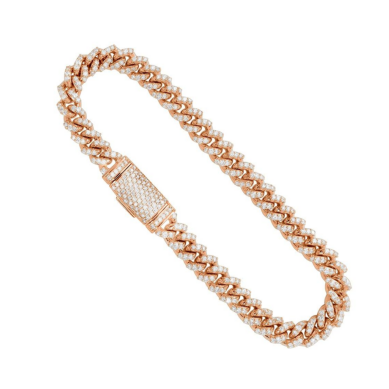

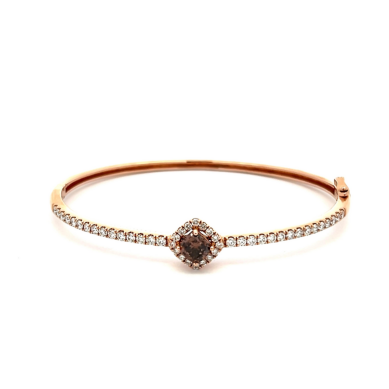

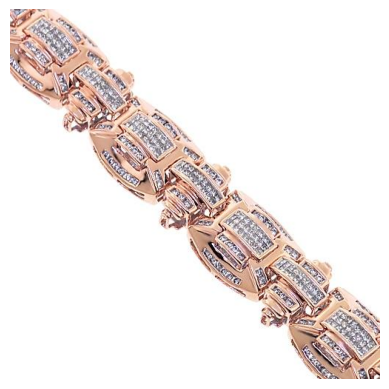

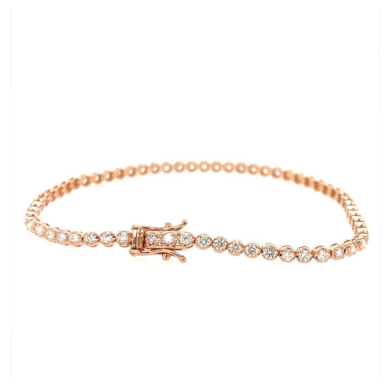

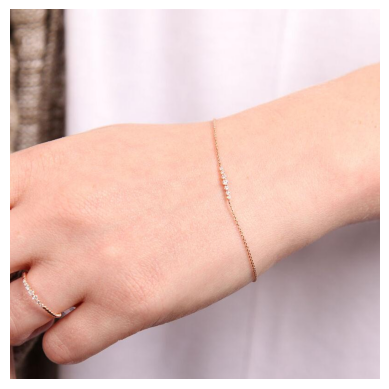

In [ ]:
import matplotlib.pyplot as plt

for image in range(5):
  sample_img = decode_image(df.iloc[image])
  # Display the image inline in Colab
  plt.imshow(sample_img)
  plt.axis('off')  # Hide axes
  plt.show()


##EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Total items: 17375
Number of unique descriptions: 1079
Most common description appears 20 times
Number of descriptions that appear only once: 0


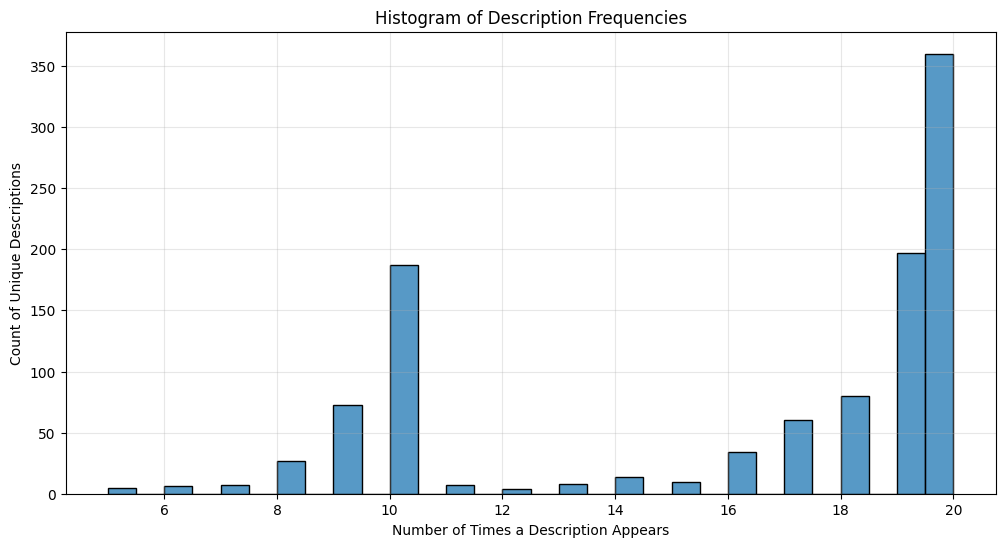


Top 10 most frequent descriptions:
20 occurrences: Bracelet, Bracelet Body Metal, 925 Sterling Silver
20 occurrences: Wedding and Engagement Ring Sets, WER_Thickness, 5mm
20 occurrences: Wedding and Engagement Ring Sets, WER_Thickness, 6mm
20 occurrences: Wedding and Engagement Ring Sets, WER_Thickness, 7mm
20 occurrences: Wedding and Engagement Ring Sets, WER_Thickness, 8mm
20 occurrences: Bracelet, Bracelet Body Metal, 18K Gold Plated
20 occurrences: Wedding and Engagement Ring Sets, WER_Use_As, Wedding_Band_and_Engagement_Ring_Set
20 occurrences: Wedding and Engagement Ring Sets, WER_Shank_Design, Twisted_Shank
20 occurrences: Bracelet, Bracelet Body Metal, 14K Yellow Gold
20 occurrences: Wedding and Engagement Ring Sets, WER_Shank_Design, V_Shaped_Chevron


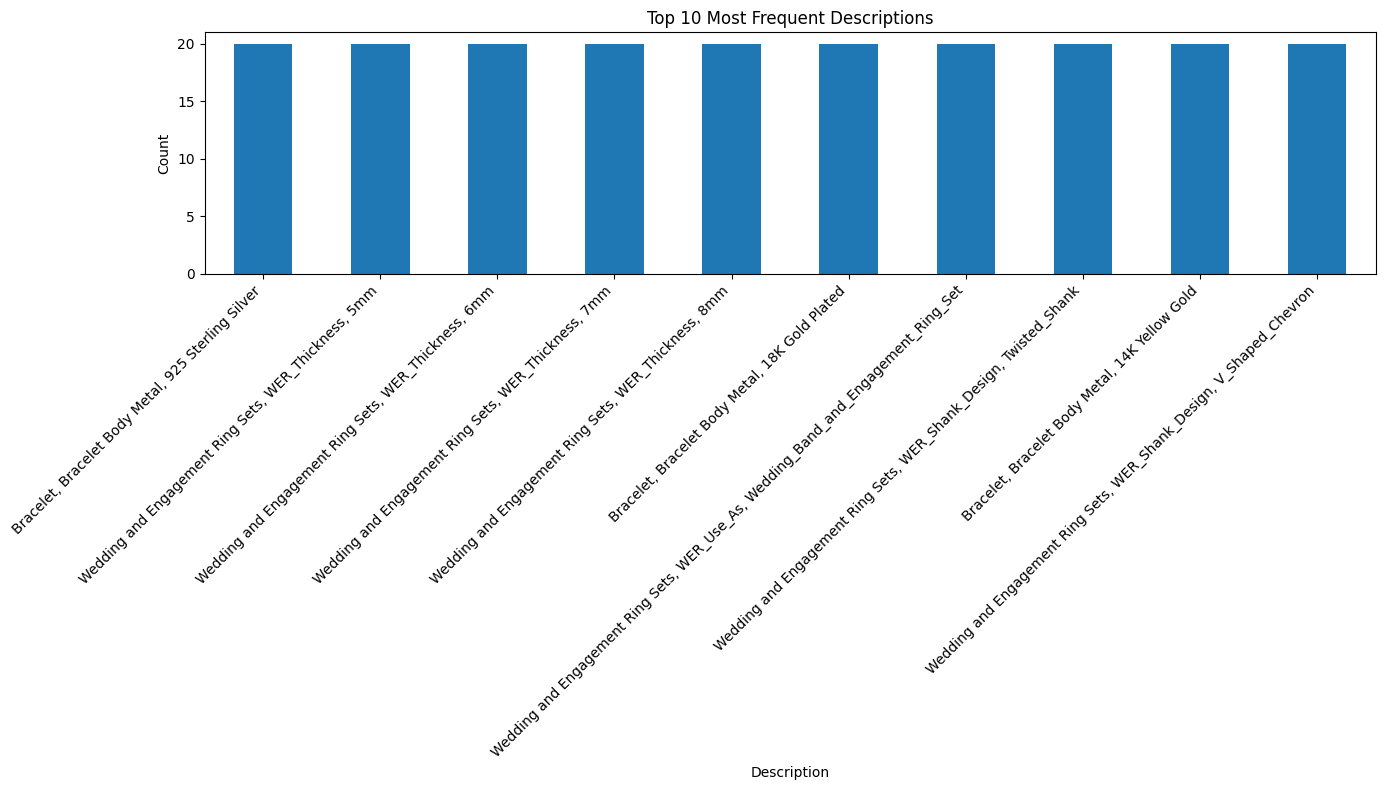

In [ ]:
description_counts = df['text'].value_counts()

# Basic statistics about unique descriptions
print(f"Total items: {len(df)}")
print(f"Number of unique descriptions: {len(description_counts)}")
print(f"Most common description appears {description_counts.max()} times")
print(f"Number of descriptions that appear only once: {sum(description_counts == 1)}")

# Plot histogram of description frequencies
plt.figure(figsize=(12, 6))
sns.histplot(description_counts.values, bins=30)
plt.title('Histogram of Description Frequencies')
plt.xlabel('Number of Times a Description Appears')
plt.ylabel('Count of Unique Descriptions')
plt.grid(True, alpha=0.3)
plt.show()

# If you want to see the top repeated descriptions
top_descriptions = description_counts.head(10)
print("\nTop 10 most frequent descriptions:")
for desc, count in top_descriptions.items():
    print(f"{count} occurrences: {desc}")

# Visualize top repeated descriptions
plt.figure(figsize=(14, 8))
top_descriptions.plot(kind='bar')
plt.title('Top 10 Most Frequent Descriptions')
plt.xlabel('Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Creating CLIP Embeddings

In [ ]:
# STEP 1: Imports and Setup
import os
import torch
import clip
import pandas as pd
import numpy as np
from PIL import Image
from io import BytesIO
from tqdm import tqdm
import requests

# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# STEP 2: Load Jewelry Dataset from Hugging Face
parquet_urls = [
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/0.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/1.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/2.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/3.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/4.parquet"
]

dfs = []
for i, url in enumerate(parquet_urls):
    print(f"📦 Downloading part {i}")
    df_part = pd.read_parquet(url)
    dfs.append(df_part)

df = pd.concat(dfs, ignore_index=True)
print(f"✅ Loaded full dataset with {len(df)} rows")

# STEP 3: Decode byte images
def decode_bytes_to_image(byte_data):
    return Image.open(BytesIO(byte_data)).convert("RGB")

# STEP 4: Compute CLIP Embeddings (batch size 128)
batch_size = 128
num_samples = len(df)
os.makedirs("clip_embeddings", exist_ok=True)

for i in tqdm(range(0, num_samples, batch_size), desc="🚀 Encoding Batches"):
    batch_idx = i // batch_size
    save_path = f"clip_embeddings/batch_{batch_idx:04d}.npy"

    if os.path.exists(save_path):
        continue  # Skip if already processed

    # Extract batch images
    batch_bytes = df["file_name"].iloc[i:i+batch_size].apply(lambda row: row["bytes"])
    batch_imgs = [decode_bytes_to_image(b) for b in batch_bytes]

    # Preprocess and move to GPU
    batch_preprocessed = torch.cat([preprocess(img).unsqueeze(0) for img in batch_imgs]).to(device)

    # Get embeddings
    with torch.no_grad():
        batch_emb = model.encode_image(batch_preprocessed)

    # Save
    np.save(save_path, batch_emb.cpu().numpy())

    # Free memory
    del batch_imgs, batch_preprocessed, batch_emb
    torch.cuda.empty_cache()


📦 Downloading part 0
📦 Downloading part 1
📦 Downloading part 2
📦 Downloading part 3
📦 Downloading part 4
✅ Loaded full dataset with 17375 rows


🚀 Encoding Batches: 100%|██████████| 136/136 [07:57<00:00,  3.51s/it]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
from glob import glob

# Path where all the .npy files are stored
embedding_dir = "clip_embeddings"

# Load all .npy files and sort them to preserve order
npy_files = sorted(glob(os.path.join(embedding_dir, "batch_*.npy")))

# Load and stack into a single numpy array
all_embeddings = np.vstack([np.load(f) for f in npy_files])
print("✅ Merged embeddings shape:", all_embeddings.shape)


✅ Merged embeddings shape: (17375, 512)


In [ ]:
# Each row is an image, each column is a feature
embeddings_df = pd.DataFrame(all_embeddings)
embeddings_df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.384033,0.072754,0.236084,-0.101135,-0.292969,0.125122,-0.138184,0.386475,0.385010,0.516602,...,0.030304,-0.556641,-0.009247,-0.257080,0.283936,-0.353516,-0.360352,0.544922,-0.269531,0.620117
1,-0.389404,-0.173828,0.723633,-0.106140,-0.063110,0.017990,0.007751,0.216309,0.090454,0.194336,...,0.008728,-0.597656,-0.085022,-0.264404,0.203491,-0.094482,-0.030518,0.549805,-0.059204,0.440430
2,-0.335938,-0.418701,0.241211,-0.340088,0.084229,0.280273,0.127808,0.231689,-0.084229,0.433350,...,0.158691,-0.405273,-0.272705,-0.314941,0.455078,-0.263916,-0.159668,0.615723,0.498535,0.417725
3,-0.485596,-0.155396,0.625977,-0.229248,-0.217896,0.231323,-0.141479,0.317627,0.167603,0.419434,...,0.025345,-0.561523,-0.218628,-0.376953,0.179565,-0.037231,-0.231323,0.588867,-0.177246,0.502441
4,-0.619141,-0.001587,0.545898,-0.263916,-0.134888,0.360352,0.456055,0.279053,-0.008301,0.305176,...,-0.413574,-0.200806,0.547363,-0.498291,0.193848,-0.199585,-0.313965,0.486084,-0.270996,0.547363


In [ ]:
# Define path in your Google Drive
output_path = "/content/drive/MyDrive/gemma_clip_embeddings.pkl"

# Save the DataFrame
embeddings_df.to_pickle(output_path)
print(f"✅ Embeddings saved to: {output_path}")


✅ Embeddings saved to: /content/drive/MyDrive/gemma_clip_embeddings.pkl


#Second Phase

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import pickle
import os
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm
import umap
import seaborn as sns

# Set PyTorch device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


##DEPICT

In [ ]:
class DEPICT(nn.Module):
    def __init__(self, input_dim=512, hidden_dim=256, latent_dim=128, n_clusters=10):
        super(DEPICT, self).__init__()

        # Encoder with more layers and better regularization
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1)
        )

        # Mean and variance for VAE
        self.fc_mu = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc_var = nn.Linear(hidden_dim // 2, latent_dim)

        # Decoder with more layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(hidden_dim, input_dim)
        )

        # Clustering layer
        self.cluster_layer = nn.Parameter(torch.Tensor(n_clusters, latent_dim))
        torch.nn.init.xavier_uniform_(self.cluster_layer)

        # Alpha parameter for t-distribution (degrees of freedom)
        # Smaller alpha creates more separated clusters
        self.alpha = 0.5

        # Number of clusters
        self.n_clusters = n_clusters

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        log_var = self.fc_var(h)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return z

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        # Encode
        mu, log_var = self.encode(x)

        # Reparameterize
        z = self.reparameterize(mu, log_var)

        # Decode
        x_recon = self.decode(z)

        # Calculate soft cluster assignments using Student's t-distribution
        q = self.soft_assign(z)

        return x_recon, mu, log_var, z, q

    def soft_assign(self, z):
        """Calculate soft cluster assignments using Student's t-distribution"""
        q = 1.0 / (1.0 + torch.sum(
            torch.pow(z.unsqueeze(1) - self.cluster_layer, 2), dim=2) / self.alpha)
        q = q.pow((self.alpha + 1.0) / 2.0)
        q = (q.t() / torch.sum(q, dim=1)).t()
        return q

    def target_distribution(self, q):
        """Calculate the target distribution P from soft assignments Q"""
        weight = q ** 2 / q.sum(0)
        return (weight.t() / weight.sum(1)).t()

##Train function

In [ ]:
def train_depict(model, dataloader, epochs=100, lr=2e-4, update_interval=5, tol=1e-4):
    """Train the improved DEPICT model with better balancing of losses"""
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

    # Track losses
    losses = {
        'total': [],
        'recon': [],
        'kl': [],
        'cluster': []
    }

    # Initialize clusters using k-means on the initial latent space
    print("Initializing cluster centers with K-means...")
    kmeans_input = []
    with torch.no_grad():
        for x_batch_tuple in dataloader:
            x_batch = x_batch_tuple[0].to(device)
            mu, _ = model.encode(x_batch)
            kmeans_input.append(mu.cpu().numpy())

    kmeans_input = np.vstack(kmeans_input)

    # Better K-means initialization
    kmeans = KMeans(n_clusters=model.n_clusters, n_init=30, max_iter=300, random_state=42)
    y_pred = kmeans.fit_predict(kmeans_input)

    # Check initial cluster distribution
    unique, counts = np.unique(y_pred, return_counts=True)
    print("Initial K-means cluster distribution:")
    for u, c in zip(unique, counts):
        print(f"Cluster {u}: {c} items ({c/len(y_pred)*100:.1f}%)")

    model.cluster_layer.data = torch.tensor(kmeans.cluster_centers_, device=device)

    # For early stopping
    best_loss = float('inf')
    patience_counter = 0
    patience = 15  # Increased patience

    print("Training improved DEPICT model...")
    for epoch in range(epochs):
        total_loss = 0
        recon_loss_sum = 0
        kl_loss_sum = 0
        cluster_loss_sum = 0

        # Update target distribution periodically
        if epoch % update_interval == 0 or epoch == epochs - 1:
            print(f"Updating target distribution at epoch {epoch}")
            q_batch_list = []
            with torch.no_grad():
                for x_batch_tuple in dataloader:
                    x_batch = x_batch_tuple[0].to(device)
                    _, _, _, _, q = model(x_batch)
                    q_batch_list.append(q.cpu())

            q_all = torch.cat(q_batch_list, dim=0)
            p_all = model.target_distribution(q_all).to(device)

            # Check cluster distribution periodically
            if epoch % 10 == 0 or epoch == epochs - 1:
                cluster_assignments = torch.argmax(q_all, dim=1).numpy()
                unique, counts = np.unique(cluster_assignments, return_counts=True)
                print(f"Epoch {epoch} cluster distribution:")
                for u, c in zip(unique, counts):
                    print(f"Cluster {u}: {c} items ({c/len(cluster_assignments)*100:.1f}%)")

            # Reset batch index
            batch_idx = 0

        # Train on batches
        for batch_idx, x_batch_tuple in enumerate(dataloader):
            optimizer.zero_grad()

            x_batch = x_batch_tuple[0].to(device)
            x_recon, mu, log_var, z, q = model(x_batch)

            # Reconstruction loss (MSE)
            recon_loss = nn.MSELoss()(x_recon, x_batch)

            # KL Divergence
            kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
            kl_loss = kl_loss / x_batch.size(0)  # Normalize by batch size

            # Clustering loss (KL divergence between Q and P)
            if epoch >= update_interval:
                start_idx = batch_idx * dataloader.batch_size
                end_idx = min(start_idx + dataloader.batch_size, len(p_all))
                p_batch = p_all[start_idx:end_idx]

                # KL divergence
                cluster_loss = torch.sum(p_batch * torch.log(p_batch / (q + 1e-10))) / x_batch.size(0)

                # Add diversity regularization to prevent cluster collapse
                q_mean = torch.mean(q, dim=0)
                diversity_loss = -torch.sum(q_mean * torch.log(q_mean + 1e-10))
                cluster_loss -= 0.1 * diversity_loss  # Encourage even cluster sizes
            else:
                cluster_loss = torch.tensor(0.0, device=device)

            # Total loss with improved weighting
            # Higher weight on clustering loss to prevent cluster collapse
            if epoch < 10:
                # Focus on representation learning in early epochs
                loss = recon_loss + 0.05 * kl_loss
            else:
                # Gradually increase clustering weight
                cluster_weight = min(3.0, 0.1 + epoch * 0.05)
                loss = recon_loss + 0.05 * kl_loss
                if epoch >= update_interval:
                    loss += cluster_weight * cluster_loss

            loss.backward()
            # Gradient clipping to prevent instability
            torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
            optimizer.step()

            # Track losses
            total_loss += loss.item()
            recon_loss_sum += recon_loss.item()
            kl_loss_sum += kl_loss.item()
            cluster_loss_sum += cluster_loss.item()

        # Average losses for the epoch
        avg_loss = total_loss / len(dataloader)
        avg_recon = recon_loss_sum / len(dataloader)
        avg_kl = kl_loss_sum / len(dataloader)
        avg_cluster = cluster_loss_sum / len(dataloader)

        # Update learning rate based on loss
        scheduler.step(avg_loss)

        losses['total'].append(avg_loss)
        losses['recon'].append(avg_recon)
        losses['kl'].append(avg_kl)
        losses['cluster'].append(avg_cluster)

        # Print progress
        if epoch % 5 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Recon: {avg_recon:.4f}, KL: {avg_kl:.4f}, Cluster: {avg_cluster:.4f}")

        # Early stopping with longer patience
        if avg_loss < best_loss - tol:
            best_loss = avg_loss
            patience_counter = 0
            # Save best model
            torch.save(model.state_dict(), 'best_depict_model.pt')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                # Load best model before returning
                model.load_state_dict(torch.load('best_depict_model.pt'))
                break

    # Final cluster assignments
    q_batch_list = []
    with torch.no_grad():
        for x_batch_tuple in dataloader:
            x_batch = x_batch_tuple[0].to(device)
            _, _, _, _, q = model(x_batch)
            q_batch_list.append(q.cpu())

    q_all = torch.cat(q_batch_list, dim=0)
    cluster_assignments = torch.argmax(q_all, dim=1).numpy()

    return model, losses, cluster_assignments

##Recommendation System

In [ ]:
class JewelryRecommender:
    def __init__(self, model, embeddings_df, original_df=None):
        self.model = model
        self.embeddings_df = embeddings_df
        self.original_df = original_df

        # Compute cluster assignments for all items
        self.compute_clusters()

        # User profiles (will be populated as users interact)
        self.user_profiles = {}

    def compute_clusters(self):
        """Compute cluster assignments and latent representations for all items"""
        print("Computing cluster assignments for all items...")
        self.model.eval()

        # Get embedding values and dimensions
        embedding_values = self.embeddings_df.values
        input_dim = embedding_values.shape[1]  # Get actual dimension from data

        print(f"Processing embeddings with {input_dim} dimensions")

        all_embeddings = torch.tensor(embedding_values, dtype=torch.float32)
        dataset = torch.utils.data.TensorDataset(all_embeddings)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)

        all_latent = []
        all_cluster_probs = []

        with torch.no_grad():
            for x_batch_tuple in dataloader:
                x_batch = x_batch_tuple[0].to(device)
                _, _, _, z, q = self.model(x_batch)
                all_latent.append(z.cpu().numpy())
                all_cluster_probs.append(q.cpu().numpy())

        self.latent_vectors = np.vstack(all_latent)
        self.cluster_probs = np.vstack(all_cluster_probs)
        self.cluster_assignments = np.argmax(self.cluster_probs, axis=1)

        # Create new DataFrame with the original data plus cluster assignments
        # Use the actual number of dimensions from the data
        result_df = pd.DataFrame(
            embedding_values,
            index=self.embeddings_df.index,
            columns=[f'feature_{i}' for i in range(input_dim)]
        )
        result_df['cluster'] = self.cluster_assignments
        self.embeddings_df = result_df

        # Compute cluster centroids
        self.cluster_centroids = {}
        for c in range(self.model.n_clusters):
            mask = self.cluster_assignments == c
            if np.sum(mask) > 0:
                self.cluster_centroids[c] = np.mean(self.latent_vectors[mask], axis=0)

        # Print cluster distribution
        unique, counts = np.unique(self.cluster_assignments, return_counts=True)
        print(f"Assigned {len(self.embeddings_df)} items to {self.model.n_clusters} clusters")
        print("Cluster distribution:")
        for cluster_id, count in zip(unique, counts):
            print(f"  Cluster {cluster_id}: {count} items ({count/len(self.embeddings_df)*100:.1f}%)")

    # Rest of the methods remain unchanged
    def update_user_profile(self, user_id, item_idx, rating=1.0):
        """Update user profile based on interaction with an item"""
        # Initialize user profile structure if it doesn't exist
        if user_id not in self.user_profiles:
            # Store total ratings and counts for each cluster
            self.user_profiles[user_id] = {
                'ratings': np.zeros(self.model.n_clusters),
                'counts': np.zeros(self.model.n_clusters)
            }

        # Get the cluster for this item
        item_cluster = self.cluster_assignments[item_idx]

        # Update total ratings and counts for this cluster
        self.user_profiles[user_id]['ratings'][item_cluster] += rating
        self.user_profiles[user_id]['counts'][item_cluster] += 1

    def recommend_for_user(self, user_id, top_n=5, top_clusters=2, exclude_items=None):
        """Recommend items from user's top preferred clusters"""
        if user_id not in self.user_profiles:
            print(f"No profile for user {user_id}, using uniform preferences")
            # Use uniform preferences
            avg_ratings = np.ones(self.model.n_clusters) / self.model.n_clusters
        else:
            # Calculate average rating per cluster
            ratings = self.user_profiles[user_id]['ratings']
            counts = self.user_profiles[user_id]['counts']

            # Initialize with small negative value to prioritize rated clusters
            avg_ratings = np.ones(self.model.n_clusters) * -0.01

            # Calculate average for clusters with ratings
            for c in range(self.model.n_clusters):
                if counts[c] > 0:
                    avg_ratings[c] = ratings[c] / counts[c]

            # Print average ratings for debugging
            print("\nYour average ratings by cluster:")
            for c in range(self.model.n_clusters):
                if counts[c] > 0:
                    print(f"  Cluster {c}: {avg_ratings[c]:.2f}/5 ({int(counts[c])} items)")

        # Get user's top preferred clusters
        preferred_clusters = np.argsort(avg_ratings)[::-1][:top_clusters]
        print(f"Selecting recommendations from your top {top_clusters} clusters: {preferred_clusters}")

        # Rest of your method remains the same
        scores = np.ones(len(self.cluster_assignments)) * -np.inf
        for rank, cluster in enumerate(preferred_clusters):
            cluster_items = np.where(self.cluster_assignments == cluster)[0]

            if len(cluster_items) > 0:
                centroid = self.cluster_centroids[cluster]
                distances = np.linalg.norm(self.latent_vectors[cluster_items] - centroid, axis=1)

                # Use actual average rating as the weight
                cluster_score = avg_ratings[cluster] * (1.0 / (1.0 + distances))
                scores[cluster_items] = cluster_score

        # Exclude already interacted items
        if exclude_items is not None:
            scores[exclude_items] = -np.inf

        # Get top N items
        top_indices = np.argsort(scores)[::-1][:top_n]
        top_scores = scores[top_indices]

        return top_indices, top_scores

    def cold_start_recommendations(self, num_per_cluster=1):
        """Get recommendations covering all clusters (for cold start)"""
        recommendations = []

        # For each cluster, get the most representative items
        for c in range(self.model.n_clusters):
            cluster_items = np.where(self.cluster_assignments == c)[0]
            if len(cluster_items) > 0:
                # Find items closest to cluster centroid
                centroid = self.cluster_centroids[c]
                distances = np.linalg.norm(self.latent_vectors[cluster_items] - centroid, axis=1)
                closest_indices = cluster_items[np.argsort(distances)[:num_per_cluster]]
                recommendations.extend(closest_indices)

        return recommendations


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import torch

class KMeansModelWrapper:
    """A wrapper around sklearn's KMeans to make it compatible with JewelryRecommender"""

    def __init__(self, n_clusters=11, random_state=42):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
        self.cluster_centers_ = None  # Will be set after fitting
        self.training = False  # Track training/eval mode for PyTorch compatibility

    def fit(self, embeddings):
        """Fit KMeans to the embeddings"""
        self.kmeans.fit(embeddings)
        self.cluster_centers_ = self.kmeans.cluster_centers_
        return self

    def predict(self, embeddings):
        """Get cluster assignments for embeddings"""
        return self.kmeans.predict(embeddings)

    def eval(self):
        """PyTorch compatibility method for evaluation mode"""
        self.training = False
        return self

    def train(self, mode=True):
        """PyTorch compatibility method for training mode"""
        self.training = mode
        return self

    def forward(self, x):
        """Mimics DEPICT's forward method for compatibility"""
        # Move to CPU for numpy operations
        if isinstance(x, torch.Tensor):
            x_np = x.cpu().numpy()
        else:
            x_np = x

        # Get cluster assignments
        cluster_indices = self.kmeans.predict(x_np)

        # Create one-hot encoded cluster probabilities
        q = np.zeros((len(x_np), self.n_clusters))
        for i, cluster_idx in enumerate(cluster_indices):
            q[i, cluster_idx] = 1.0

        # For latent vectors, we use the original embeddings
        # This is different from DEPICT but works well for recommendations
        z = x_np

        # Convert back to tensors if input was tensor
        if isinstance(x, torch.Tensor):
            z = torch.tensor(z, dtype=torch.float32, device=x.device)
            q = torch.tensor(q, dtype=torch.float32, device=x.device)

        # Return dummy values for reconstruction and the actual values we need
        x_recon = x  # Just return input as "reconstruction"
        mu = z       # Use embeddings as mu
        log_var = torch.zeros_like(z) if isinstance(x, torch.Tensor) else np.zeros_like(z)  # Dummy log_var

        return x_recon, mu, log_var, z, q

    def __call__(self, x):
        """Allow the model to be called like a function"""
        return self.forward(x)

    def to(self, device):
        """PyTorch compatibility method for device placement"""
        # KMeans doesn't need to be on a specific device, so just return self
        return self

## Image Loading and Visualization

In [ ]:
def decode_bytes_to_image(byte_data):
    """Decode byte data to a PIL Image"""
    return Image.open(BytesIO(byte_data)).convert("RGB")

def load_parquet_dataset(urls):
    """Load and combine parquet files from URLs"""
    dfs = []
    for i, url in enumerate(urls):
        print(f"Downloading part {i}...")
        df_part = pd.read_parquet(url)
        dfs.append(df_part)

    df = pd.concat(dfs, ignore_index=True)
    print(f"Loaded dataset with {len(df)} rows")
    return df

def display_jewelry_item(df, idx):
    """Display a single jewelry item from the dataframe"""
    if 'file_name' in df.columns:
        try:
            byte_data = df.iloc[idx]['file_name']['bytes']
            img = decode_bytes_to_image(byte_data)

            plt.figure(figsize=(5, 5))
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Item {idx}")
            plt.show()

            # Display description if available
            if 'text' in df.columns:
                print(f"Description: {df.iloc[idx]['text']}")

            return img
        except Exception as e:
            print(f"Error displaying image: {e}")
            return None
    else:
        print("DataFrame does not contain 'file_name' column")
        return None

##Saving

In [ ]:
def save_model_to_drive(model, recommender, losses, drive_path="/content/drive/MyDrive/jewelry_recommender"):
    """Save trained model and recommender to Google Drive"""
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    # Create directory if it doesn't exist
    os.makedirs(drive_path, exist_ok=True)

    print(f"Saving model and recommender to {drive_path}...")

    # Save model state dict
    model_path = os.path.join(drive_path, "depict_model.pt")
    torch.save(model.state_dict(), model_path)
    print(f"Model saved to {model_path}")

    # Save model architecture parameters
    model_config = {
        'input_dim': model.encoder[0].in_features,
        'hidden_dim': model.encoder[0].out_features,
        'latent_dim': model.fc_mu.out_features,
        'n_clusters': model.n_clusters
    }

    with open(os.path.join(drive_path, "model_config.pkl"), 'wb') as f:
        pickle.dump(model_config, f)

    # Save recommender state (excluding the model to avoid redundancy)
    recommender_copy = recommender
    model_copy = recommender_copy.model
    recommender_copy.model = None  # Temporarily remove model reference

    with open(os.path.join(drive_path, "recommender.pkl"), 'wb') as f:
        pickle.dump(recommender_copy, f)

    # Restore model reference
    recommender_copy.model = model_copy

    # Save losses
    with open(os.path.join(drive_path, "training_losses.pkl"), 'wb') as f:
        pickle.dump(losses, f)

    # Save cluster assignments and latent vectors (for quick loading)
    np.save(os.path.join(drive_path, "cluster_assignments.npy"), recommender.cluster_assignments)
    np.save(os.path.join(drive_path, "latent_vectors.npy"), recommender.latent_vectors)
    np.save(os.path.join(drive_path, "cluster_probs.npy"), recommender.cluster_probs)

    # Save embeddings dataframe with cluster information
    recommender.embeddings_df.to_pickle(os.path.join(drive_path, "embeddings_with_clusters.pkl"))

    # Create a README file with instructions
    readme_text = """
    # Jewelry Recommender System

    This directory contains the saved model and data for the DEPICT-based jewelry recommendation system.

    ## Files:
    - depict_model.pt: PyTorch model state dictionary
    - model_config.pkl: Model architecture parameters
    - recommender.pkl: Recommender object (without model)
    - training_losses.pkl: Loss values during training
    - cluster_assignments.npy: Cluster assignments for all items
    - latent_vectors.npy: Latent representations of all items
    - cluster_probs.npy: Soft cluster probabilities for all items
    - embeddings_with_clusters.pkl: DataFrame with embeddings and cluster info

    ## To load the model and recommender:
    ```python
    from google.colab import drive
    drive.mount('/content/drive')

    loaded_model, loaded_recommender = load_model_from_drive('/content/drive/MyDrive/jewelry_recommender')
    ```
    """

    with open(os.path.join(drive_path, "README.md"), 'w') as f:
        f.write(readme_text)

    print(f"All components saved to {drive_path}")
    return drive_path

##Loading

In [ ]:
def load_model_from_drive(drive_path="/content/drive/MyDrive/jewelry_recommender"):
    """Load trained model and recommender from Google Drive"""
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    print(f"Loading model and recommender from {drive_path}...")

    # Load model configuration
    with open(os.path.join(drive_path, "model_config.pkl"), 'rb') as f:
        model_config = pickle.load(f)

    # Recreate model with same architecture
    model = DEPICT(
        input_dim=model_config['input_dim'],
        hidden_dim=32,
        latent_dim=16,
        n_clusters=model_config['n_clusters']
    ).to(device)

    # Load saved weights
    model.load_state_dict(torch.load(os.path.join(drive_path, "depict_model.pt")))
    model.eval()  # Set to evaluation mode

    # Load recommender
    with open(os.path.join(drive_path, "recommender.pkl"), 'rb') as f:
        recommender = pickle.load(f)

    # Restore model reference
    recommender.model = model

    print("Model and recommender loaded successfully")
    return model, recommender

##Main

In [ ]:
def main(embeddings_df, original_df=None, n_clusters=5, hidden_dim=256, latent_dim=128, batch_size=128, epochs=100, drive_save_path=None):
    """Main execution function with improved DEPICT model that adapts to input dimensions"""
    print(f"Setting up Improved DEPICT with {n_clusters} clusters...")

    # Convert DataFrame to numpy and create dataset
    if isinstance(embeddings_df, pd.DataFrame):
        embeddings = embeddings_df.values
    else:
        embeddings = embeddings_df

    # Get input dimensions from the data
    input_dim = embeddings.shape[1]

    # Adapt hidden_dim and latent_dim to input dimensions
    # For UMAP with ~10 dimensions, we need smaller networks than for 512-dim embeddings
    if input_dim < 50:  # Detect low-dimensional embeddings like UMAP
        adapted_hidden_dim = min(hidden_dim, input_dim * 4)
        adapted_latent_dim = min(latent_dim, input_dim * 2)
        print(f"Detected low-dimensional embeddings ({input_dim}). Adapting architecture:")
        print(f"  - Original: hidden_dim={hidden_dim}, latent_dim={latent_dim}")
        print(f"  - Adapted: hidden_dim={adapted_hidden_dim}, latent_dim={adapted_latent_dim}")
        hidden_dim = int(adapted_hidden_dim)
        latent_dim = int(adapted_latent_dim)
    else:
        print(f"Using standard architecture with input_dim={input_dim}")

    # Convert to tensor and create dataloader
    embeddings = torch.tensor(embeddings, dtype=torch.float32)
    dataset = torch.utils.data.TensorDataset(embeddings)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Create and train improved DEPICT model
    model = DEPICT(
        input_dim=input_dim,
        hidden_dim=hidden_dim,
        latent_dim=latent_dim,
        n_clusters=n_clusters
    ).to(device)

    # Log model architecture
    print(f"DEPICT Model configuration:")
    print(f"  - Input dimensions: {input_dim}")
    print(f"  - Hidden dimensions: {hidden_dim}")
    print(f"  - Latent dimensions: {latent_dim}")
    print(f"  - Number of clusters: {n_clusters}")

    # Train model
    model, losses, cluster_assignments = train_depict(model, dataloader, epochs=epochs, update_interval=2)

    # Create recommender
    recommender = JewelryRecommender(model, embeddings_df, original_df)

    # Save to Google Drive if path provided
    if drive_save_path:
        save_model_to_drive(model, recommender, losses, drive_save_path)

    return model, recommender, losses

##Usage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import pickle

Mounted at /content/drive


In [ ]:
embeddings_df = pd.read_pickle("/content/drive/MyDrive/gemma_clip_embeddings.pkl")


In [ ]:
embeddings_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.384033,0.072754,0.236084,-0.101135,-0.292969,0.125122,-0.138184,0.386475,0.385010,0.516602,...,0.030304,-0.556641,-0.009247,-0.257080,0.283936,-0.353516,-0.360352,0.544922,-0.269531,0.620117
1,-0.389404,-0.173828,0.723633,-0.106140,-0.063110,0.017990,0.007751,0.216309,0.090454,0.194336,...,0.008728,-0.597656,-0.085022,-0.264404,0.203491,-0.094482,-0.030518,0.549805,-0.059204,0.440430
2,-0.335938,-0.418701,0.241211,-0.340088,0.084229,0.280273,0.127808,0.231689,-0.084229,0.433350,...,0.158691,-0.405273,-0.272705,-0.314941,0.455078,-0.263916,-0.159668,0.615723,0.498535,0.417725
3,-0.485596,-0.155396,0.625977,-0.229248,-0.217896,0.231323,-0.141479,0.317627,0.167603,0.419434,...,0.025345,-0.561523,-0.218628,-0.376953,0.179565,-0.037231,-0.231323,0.588867,-0.177246,0.502441
4,-0.619141,-0.001587,0.545898,-0.263916,-0.134888,0.360352,0.456055,0.279053,-0.008301,0.305176,...,-0.413574,-0.200806,0.547363,-0.498291,0.193848,-0.199585,-0.313965,0.486084,-0.270996,0.547363


In [ ]:
parquet_urls = [
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/0.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/1.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/2.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/3.parquet",
    "https://huggingface.co/api/datasets/ayesha111/dataset_jewellery1/parquet/default/train/4.parquet"
]
original_df = load_parquet_dataset(parquet_urls)

Loaded dataset with 17375 rows


##Comapring Depict against Kmeans

Testing k=2 clusters...
  Distortion: 445346.26, Silhouette Score: 0.1106
Testing k=3 clusters...
  Distortion: 419824.30, Silhouette Score: 0.0980
Testing k=4 clusters...
  Distortion: 402239.83, Silhouette Score: 0.0666
Testing k=5 clusters...
  Distortion: 390035.68, Silhouette Score: 0.0750
Testing k=6 clusters...
  Distortion: 381619.96, Silhouette Score: 0.0680
Testing k=7 clusters...
  Distortion: 373500.56, Silhouette Score: 0.0677
Testing k=8 clusters...
  Distortion: 366161.98, Silhouette Score: 0.0710
Testing k=9 clusters...
  Distortion: 359430.76, Silhouette Score: 0.0724
Testing k=10 clusters...
  Distortion: 353398.76, Silhouette Score: 0.0617
Testing k=11 clusters...
  Distortion: 349740.56, Silhouette Score: 0.0626
Testing k=12 clusters...
  Distortion: 346257.34, Silhouette Score: 0.0626
Testing k=13 clusters...
  Distortion: 343530.43, Silhouette Score: 0.0649
Testing k=14 clusters...
  Distortion: 340608.25, Silhouette Score: 0.0414
Testing k=15 clusters...
  Distor

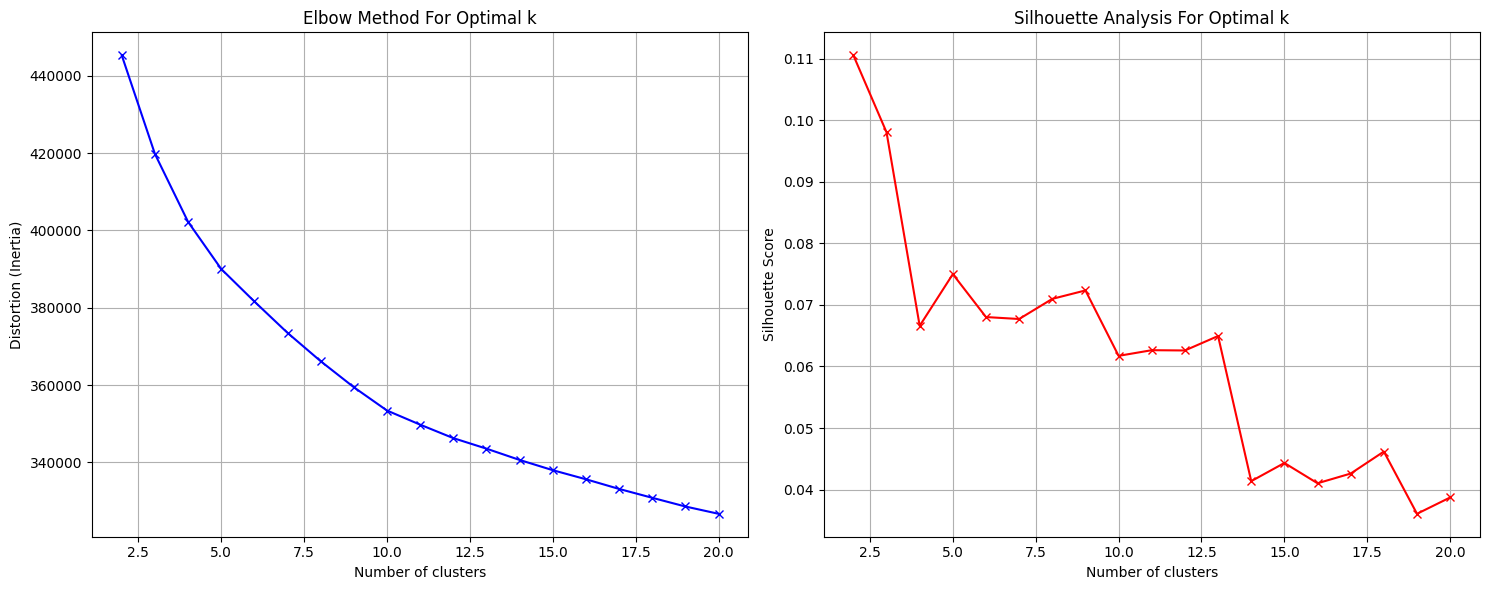


Best k based on Silhouette Score: 2 clusters (score: 0.1106)
Estimated elbow point: 3 clusters


In [ ]:
embeddings = embeddings_df.values

# Elbow Method + Silhouette Analysis
max_k = 20  # Maximum number of clusters to try
distortions = []    # For elbow method
silhouette_scores = []  # For silhouette analysis

for k in range(2, max_k + 1):  # Start from 2 clusters
    print(f"Testing k={k} clusters...")

    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(embeddings)

    # Calculate metrics
    distortions.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(embeddings, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"  Distortion: {kmeans.inertia_:.2f}, Silhouette Score: {silhouette_avg:.4f}")

# Create a comparative visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot Elbow Method
ax1.plot(range(2, max_k + 1), distortions, 'bx-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Distortion (Inertia)')
ax1.set_title('Elbow Method For Optimal k')
ax1.grid(True)

# Plot Silhouette Scores
ax2.plot(range(2, max_k + 1), silhouette_scores, 'rx-')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis For Optimal k')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print the cluster with highest silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from 2
print(f"\nBest k based on Silhouette Score: {best_k} clusters (score: {max(silhouette_scores):.4f})")

# Find the elbow point (where the rate of decrease sharply changes)
# Simple method: find the point of maximum curvature
deltas = np.diff(distortions)
delta_deltas = np.diff(deltas)
elbow_k = np.argmax(np.abs(delta_deltas)) + 3  # +3 because of two diff operations and starting from 2
print(f"Estimated elbow point: {elbow_k} clusters")

In [ ]:
# Apply UMAP for non-linear dimensionality reduction
import umap

reducer = umap.UMAP(n_components=10, n_neighbors=15, min_dist=0.1, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Then apply clustering on the reduced dimensions
kmeans = KMeans(n_clusters=10, random_state=42)
umap_cluster_labels = kmeans.fit_predict(umap_embeddings)

# Check silhouette score
umap_silhouette = silhouette_score(umap_embeddings, umap_cluster_labels)
print(f"UMAP + KMeans Silhouette Score: {umap_silhouette:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP + KMeans Silhouette Score: 0.5170


UMAP + KMeans with 2 clusters: Silhouette = 0.3623
UMAP + KMeans with 3 clusters: Silhouette = 0.4244
UMAP + KMeans with 4 clusters: Silhouette = 0.4696
UMAP + KMeans with 5 clusters: Silhouette = 0.5235
UMAP + KMeans with 6 clusters: Silhouette = 0.4930
UMAP + KMeans with 7 clusters: Silhouette = 0.4860
UMAP + KMeans with 8 clusters: Silhouette = 0.5137
UMAP + KMeans with 9 clusters: Silhouette = 0.5216
UMAP + KMeans with 10 clusters: Silhouette = 0.5240
UMAP + KMeans with 11 clusters: Silhouette = 0.5285
UMAP + KMeans with 12 clusters: Silhouette = 0.4897
UMAP + KMeans with 13 clusters: Silhouette = 0.5001
UMAP + KMeans with 14 clusters: Silhouette = 0.5023
UMAP + KMeans with 15 clusters: Silhouette = 0.5182


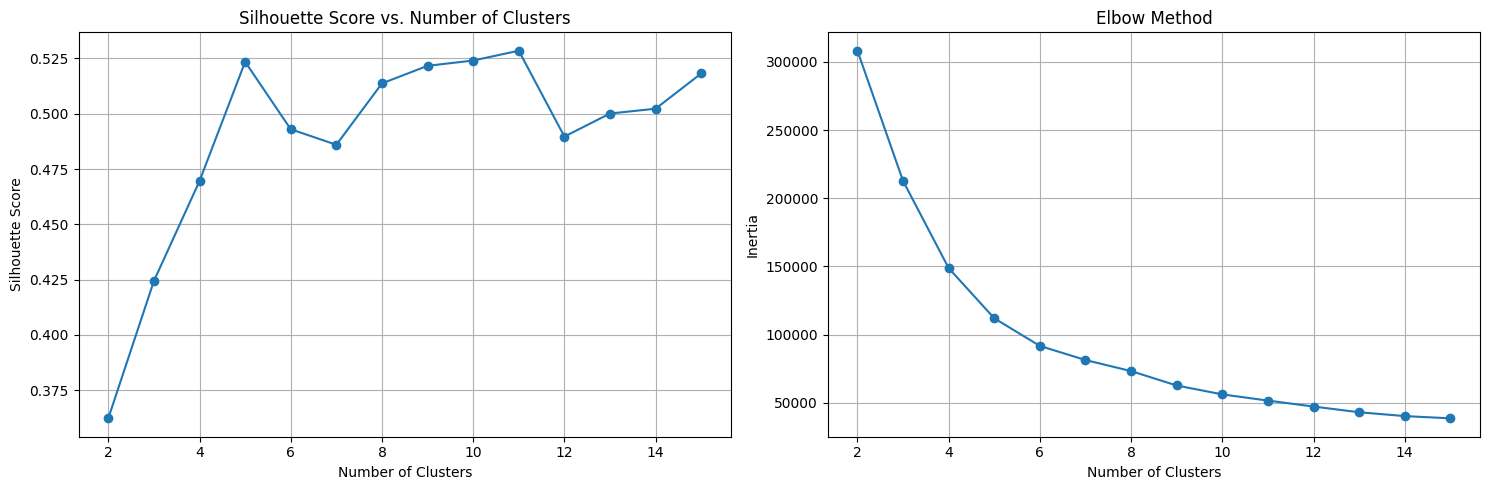

In [ ]:
# Test different cluster counts with your UMAP embeddings
silhouette_scores = []
inertia_values = []
cluster_range = range(2, 16)  # Try 2-15 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(umap_embeddings)

    score = silhouette_score(umap_embeddings, cluster_labels)
    silhouette_scores.append(score)
    inertia_values.append(kmeans.inertia_)

    print(f"UMAP + KMeans with {n_clusters} clusters: Silhouette = {score:.4f}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(cluster_range, silhouette_scores, 'o-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Score vs. Number of Clusters')
ax1.grid(True)

ax2.plot(cluster_range, inertia_values, 'o-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title('Elbow Method')
ax2.grid(True)

plt.tight_layout()
plt.show()


Training DEPICT with 2 clusters...
Initializing cluster centers with K-means...
Initial K-means cluster distribution:
Cluster 0: 5256 items (30.3%)
Cluster 1: 12119 items (69.7%)
Training improved DEPICT model...
Updating target distribution at epoch 0
Epoch 0 cluster distribution:
Cluster 0: 6735 items (38.8%)
Cluster 1: 10640 items (61.2%)
Epoch 1/30, Loss: 35.4642, Recon: 35.3251, KL: 2.7813, Cluster: 0.0000
Updating target distribution at epoch 3
Epoch 6/30, Loss: 14.8018, Recon: 14.5475, KL: 5.0857, Cluster: -0.0645
Updating target distribution at epoch 6
Updating target distribution at epoch 9
Epoch 11/30, Loss: 2.9287, Recon: 2.6399, KL: 6.5661, Cluster: -0.0658
Updating target distribution at epoch 12
Updating target distribution at epoch 15
Epoch 16/30, Loss: 1.6607, Recon: 1.4395, KL: 5.5777, Cluster: -0.0679
Updating target distribution at epoch 18
Epoch 21/30, Loss: 1.4585, Recon: 1.2667, KL: 5.3455, Cluster: -0.0686
Updating target distribution at epoch 21
Updating target

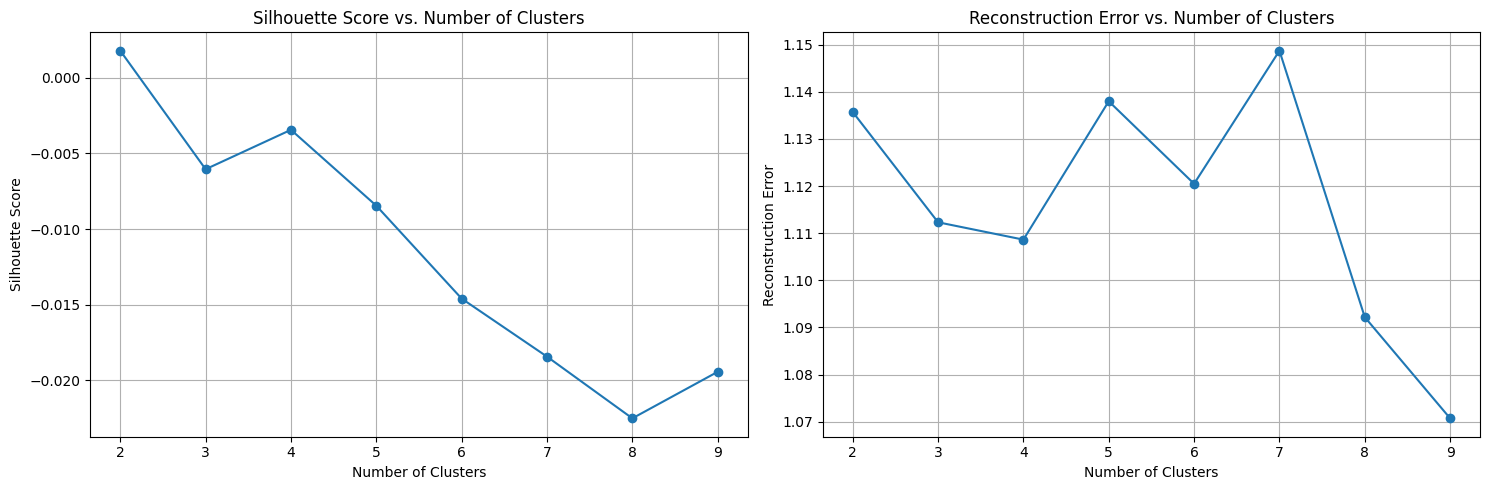

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import torch
from torch.utils.data import TensorDataset, DataLoader

# Range of clusters to test
cluster_range = range(2, 10)  # Using a smaller range due to computational cost
silhouette_scores = []
reconstruction_errors = []  # Alternative to inertia for DEPICT

# Create tensor dataset once
tensor_data = torch.tensor(umap_embeddings, dtype=torch.float32)
dataset = TensorDataset(tensor_data)

for n_clusters in cluster_range:
    print(f"\nTraining DEPICT with {n_clusters} clusters...")

    # Initialize model with current cluster count
    model = DEPICT(
        input_dim=umap_embeddings.shape[1],  # UMAP dimensions
        hidden_dim=32,  # Smaller network for faster training
        latent_dim=16,  # Smaller latent dimensions
        n_clusters=n_clusters
    ).to(device)

    # Create dataloader
    dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

    # Train model with fewer epochs for faster comparison
    model, losses, cluster_assignments = train_depict(
        model,
        dataloader,
        epochs=30,  # Reduced epochs for faster evaluation
        update_interval=3
    )

    # Calculate silhouette score
    score = silhouette_score(umap_embeddings, cluster_assignments)
    silhouette_scores.append(score)

    # Use final reconstruction error as alternative to inertia
    reconstruction_errors.append(losses['recon'][-1])

    print(f"DEPICT with {n_clusters} clusters: Silhouette = {score:.4f}, Recon Error = {losses['recon'][-1]:.4f}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(list(cluster_range), silhouette_scores, 'o-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Score')
ax1.set_title('Silhouette Score vs. Number of Clusters')
ax1.grid(True)

ax2.plot(list(cluster_range), reconstruction_errors, 'o-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Reconstruction Error')
ax2.set_title('Reconstruction Error vs. Number of Clusters')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def interactive_jewelry_rating(recommender, original_df, my_user_id="me"):
    """Interactive system to rate jewelry items with clear input prompts"""
    # Track rated items
    rated_items = {}

    # Sample items from each cluster to rate
    samples_per_cluster = 2
    all_samples = []

    print("=== PREPARING JEWELRY SAMPLES ===")
    # First collect samples from each cluster
    for cluster_id in range(recommender.model.n_clusters):
        cluster_items = np.where(recommender.cluster_assignments == cluster_id)[0]
        if len(cluster_items) > 0:
            # Sample a few items from each cluster
            sample_indices = np.random.choice(cluster_items,
                                             size=min(samples_per_cluster, len(cluster_items)),
                                             replace=False)
            for idx in sample_indices:
                all_samples.append((idx, cluster_id))

    # Now rate each item one by one
    print("\n=== RATING SESSION STARTED ===")
    print("Rate each jewelry item from 1-5 stars (or enter 0 to skip)")
    print("Press Enter after typing your rating")

    for i, (idx, cluster_id) in enumerate(all_samples):
        print(f"\n{'='*50}")
        print(f"ITEM {i+1} OF {len(all_samples)} (From Cluster {cluster_id})")
        print(f"{'='*50}")

        # Display the item
        try:
            plt.figure(figsize=(1, 1))
            byte_data = original_df.iloc[idx]['file_name']['bytes']
            img = decode_bytes_to_image(byte_data)
            plt.imshow(img)
            plt.title(f"Item {idx} (Cluster {cluster_id})")
            plt.axis('off')
            plt.show()


            # Display description if available
            if 'text' in original_df.columns:
                print(f"Description: {original_df.iloc[idx]['text']}")
        except Exception as e:
            print(f"Error displaying item: {e}")
            continue

        # Now get rating with a very visible prompt
        print("\n" + "*"*30)
        print("YOUR RATING (1-5, or 0 to skip): ", end="")
        rating_str = input()
        print("*"*30)


        try:
            rating = float(rating_str)
            if rating > 0:
                rated_items[idx] = rating
                # Update user profile
                recommender.update_user_profile(my_user_id, idx, rating)
                print(f"✅ You rated this item {rating}/5 stars")
            else:
                print("⏩ Item skipped")
        except ValueError:
            print("⚠️ Invalid rating, item skipped")

    print(f"\n=== RATING SESSION COMPLETED ===")
    print(f"You rated {len(rated_items)} items")

    # Show rating summary by cluster
    print("\nYour ratings by cluster:")
    cluster_ratings = {}
    for idx, rating in rated_items.items():
        cluster = recommender.cluster_assignments[idx]
        if cluster not in cluster_ratings:
            cluster_ratings[cluster] = []
        cluster_ratings[cluster].append(rating)

    for cluster, ratings in cluster_ratings.items():
        avg_rating = sum(ratings) / len(ratings)
        print(f"Cluster {cluster}: Average rating {avg_rating:.2f}/5 ({len(ratings)} items)")

    return rated_items

# 4. Function to get personalized recommendations
def get_my_recommendations(recommender, original_df, my_user_id="me", top_n=5):
    """Get and display personalized recommendations"""
    # Get recommendations
    rec_indices, rec_scores = recommender.recommend_for_user(my_user_id, top_n=top_n)

    print(f"Top {top_n} recommendations for you:")

    plt.figure(figsize=(15, 3))
    for i, (idx, score) in enumerate(zip(rec_indices, rec_scores)):
        plt.subplot(1, top_n, i+1)
        try:
            byte_data = original_df.iloc[idx]['file_name']['bytes']
            img = decode_bytes_to_image(byte_data)
            plt.imshow(img)
            plt.title(f"Score: {score:.2f}\nCluster: {recommender.cluster_assignments[idx]}")
            plt.axis('off')

            # Print description if available
            if 'text' in original_df.columns:
                print(f"Item {idx}: {original_df.iloc[idx]['text']}")

        except Exception as e:
            plt.text(0.5, 0.5, f"Error: {e}", ha='center', va='center')

    plt.tight_layout()
    plt.show()

    return rec_indices, rec_scores



In [ ]:
kmeans_model = KMeansModelWrapper(n_clusters=11)
kmeans_model.fit(umap_embeddings)
# Create recommender with the KMeans model
umap_df = pd.DataFrame(
    umap_embeddings,
    index=embeddings_df.index if hasattr(embeddings_df, 'index') else None
)

recommender = JewelryRecommender(kmeans_model, umap_df, original_df)

Computing cluster assignments for all items...
Processing embeddings with 10 dimensions
Assigned 17375 items to 11 clusters
Cluster distribution:
  Cluster 0: 2362 items (13.6%)
  Cluster 1: 844 items (4.9%)
  Cluster 2: 1508 items (8.7%)
  Cluster 3: 2178 items (12.5%)
  Cluster 4: 2309 items (13.3%)
  Cluster 5: 2196 items (12.6%)
  Cluster 6: 962 items (5.5%)
  Cluster 7: 1927 items (11.1%)
  Cluster 8: 76 items (0.4%)
  Cluster 9: 2904 items (16.7%)
  Cluster 10: 109 items (0.6%)


=== PREPARING JEWELRY SAMPLES ===

=== RATING SESSION STARTED ===
Rate each jewelry item from 1-5 stars (or enter 0 to skip)
Press Enter after typing your rating

ITEM 1 OF 22 (From Cluster 0)


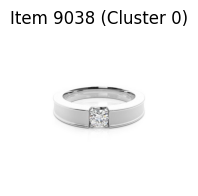

Description: Men Engagement Rings, MER_Prong_Claw, Round 4 Prong

******************************
YOUR RATING (1-5, or 0 to skip): 5
******************************
✅ You rated this item 5.0/5 stars

ITEM 2 OF 22 (From Cluster 0)


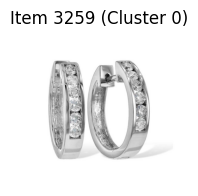

Description: Earrings, Earring_Gem_Setting, Channel

******************************
YOUR RATING (1-5, or 0 to skip): 5
******************************
✅ You rated this item 5.0/5 stars

ITEM 3 OF 22 (From Cluster 1)


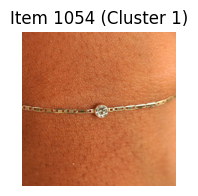

Description: Bracelet, Bracelet Gem Setting, Solitaire

******************************
YOUR RATING (1-5, or 0 to skip): 1
******************************
✅ You rated this item 1.0/5 stars

ITEM 4 OF 22 (From Cluster 1)


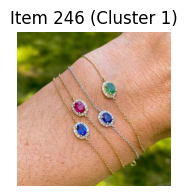

Description: Bracelet, Bracelet Gem, Ruby

******************************
YOUR RATING (1-5, or 0 to skip): 2
******************************
✅ You rated this item 2.0/5 stars

ITEM 5 OF 22 (From Cluster 2)


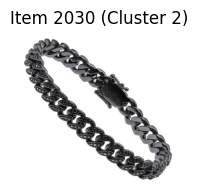

Description: Bracelet, Bracelet Use As, Chain_Bracelet

******************************
YOUR RATING (1-5, or 0 to skip): 5
******************************
✅ You rated this item 5.0/5 stars

ITEM 6 OF 22 (From Cluster 2)


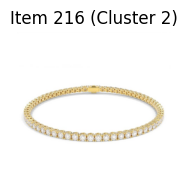

Description: Bracelet, Bracelet Gem, Diamond

******************************
YOUR RATING (1-5, or 0 to skip): 5
******************************
✅ You rated this item 5.0/5 stars

ITEM 7 OF 22 (From Cluster 3)


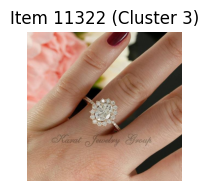

Description: Necklaces, Necklace_Gem_Color, Forever One - Colorless - D

******************************
YOUR RATING (1-5, or 0 to skip): 4
******************************
✅ You rated this item 4.0/5 stars

ITEM 8 OF 22 (From Cluster 3)


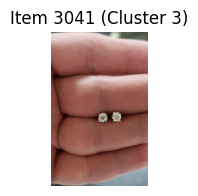

Description: Earrings, Earring_Gem_Clarity, IF

******************************
YOUR RATING (1-5, or 0 to skip): 3
******************************
✅ You rated this item 3.0/5 stars

ITEM 9 OF 22 (From Cluster 4)


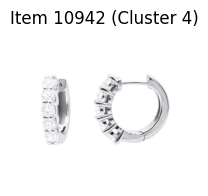

Description: Necklaces, Necklace_Gem_Carat, Approx 0.75 Carat Smalls

******************************
YOUR RATING (1-5, or 0 to skip): 2
******************************
✅ You rated this item 2.0/5 stars

ITEM 10 OF 22 (From Cluster 4)


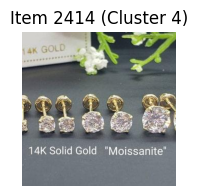

Description: Earrings, Earing_Profile, Low Basket

******************************
YOUR RATING (1-5, or 0 to skip): 1
******************************
✅ You rated this item 1.0/5 stars

ITEM 11 OF 22 (From Cluster 5)


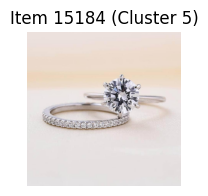

Description: Wedding and Engagement Ring Sets, WER_Prong_Claw, Round_6-Prong

******************************
YOUR RATING (1-5, or 0 to skip): 0
******************************
⏩ Item skipped

ITEM 12 OF 22 (From Cluster 5)


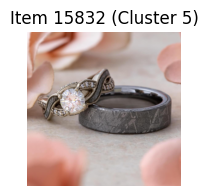

Description: Wedding and Engagement Ring Sets, WER_Shank_Design, Twisted_Shank

******************************
YOUR RATING (1-5, or 0 to skip): 3
******************************
✅ You rated this item 3.0/5 stars

ITEM 13 OF 22 (From Cluster 6)


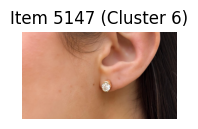

Description: Earrings, Earring_Use_as, Long Post Earrings

******************************
YOUR RATING (1-5, or 0 to skip): 5
******************************
✅ You rated this item 5.0/5 stars

ITEM 14 OF 22 (From Cluster 6)


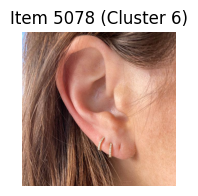

Description: Earrings, Earring_Use_as, Huggie Earrings

******************************
YOUR RATING (1-5, or 0 to skip): 2
******************************
✅ You rated this item 2.0/5 stars

ITEM 15 OF 22 (From Cluster 7)


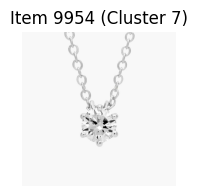

Description: Necklaces, Necklaces_Profile, Basket

******************************
YOUR RATING (1-5, or 0 to skip): 1
******************************
✅ You rated this item 1.0/5 stars

ITEM 16 OF 22 (From Cluster 7)


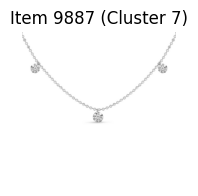

Description: Necklaces, Necklaces_Length, 18 Inch

******************************
YOUR RATING (1-5, or 0 to skip): 4
******************************
✅ You rated this item 4.0/5 stars

ITEM 17 OF 22 (From Cluster 8)


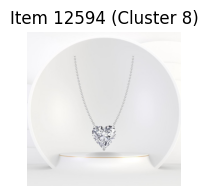

Description: Necklaces, Necklace_Prong_Claw, Heart

******************************
YOUR RATING (1-5, or 0 to skip): 0
******************************
⏩ Item skipped

ITEM 18 OF 22 (From Cluster 8)


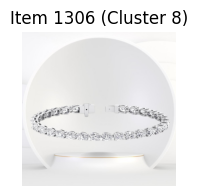

Description: Bracelet, Bracelet Gem Shape, Pear

******************************
YOUR RATING (1-5, or 0 to skip): 2
******************************
✅ You rated this item 2.0/5 stars

ITEM 19 OF 22 (From Cluster 9)


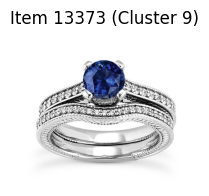

Description: Wedding and Engagement Ring Sets, WER_Gem, Sapphire

******************************
YOUR RATING (1-5, or 0 to skip): 1
******************************
✅ You rated this item 1.0/5 stars

ITEM 20 OF 22 (From Cluster 9)


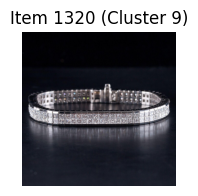

Description: Bracelet, Bracelet Gem Shape, Princess

******************************
YOUR RATING (1-5, or 0 to skip): 1
******************************
✅ You rated this item 1.0/5 stars

ITEM 21 OF 22 (From Cluster 10)


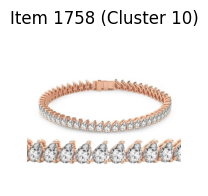

Description: Bracelet, Bracelet Prong Claw, 7 Prong

******************************
YOUR RATING (1-5, or 0 to skip): 0
******************************
⏩ Item skipped

ITEM 22 OF 22 (From Cluster 10)


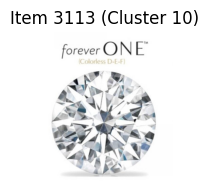

Description: Earrings, Earring_Gem_Color, Forever One - Colorless - D

******************************
YOUR RATING (1-5, or 0 to skip): 1
******************************
✅ You rated this item 1.0/5 stars

=== RATING SESSION COMPLETED ===
You rated 19 items

Your ratings by cluster:
Cluster 0: Average rating 5.00/5 (2 items)
Cluster 1: Average rating 1.50/5 (2 items)
Cluster 2: Average rating 5.00/5 (2 items)
Cluster 3: Average rating 3.50/5 (2 items)
Cluster 4: Average rating 1.50/5 (2 items)
Cluster 5: Average rating 3.00/5 (1 items)
Cluster 6: Average rating 3.50/5 (2 items)
Cluster 7: Average rating 2.50/5 (2 items)
Cluster 8: Average rating 2.00/5 (1 items)
Cluster 9: Average rating 1.00/5 (2 items)
Cluster 10: Average rating 1.00/5 (1 items)

Your average ratings by cluster:
  Cluster 0: 5.00/5 (2 items)
  Cluster 1: 1.50/5 (2 items)
  Cluster 2: 5.00/5 (2 items)
  Cluster 3: 3.50/5 (2 items)
  Cluster 4: 1.50/5 (2 items)
  Cluster 5: 3.00/5 (1 items)
  Cluster 6: 3.50/5 (2 items)
 

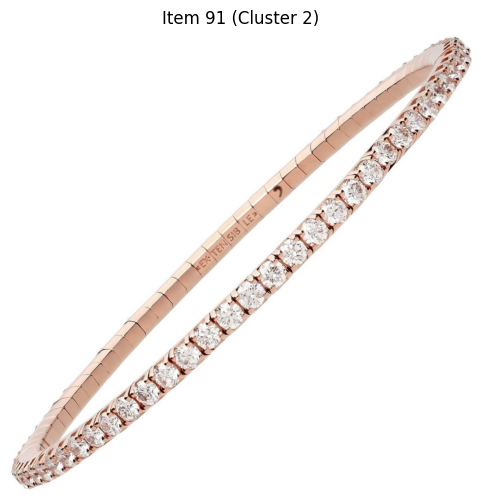

Description: Bracelet, Bracelet Body Metal, 18K Rose Gold

--- Recommendation #2 (Score: 3.92) ---


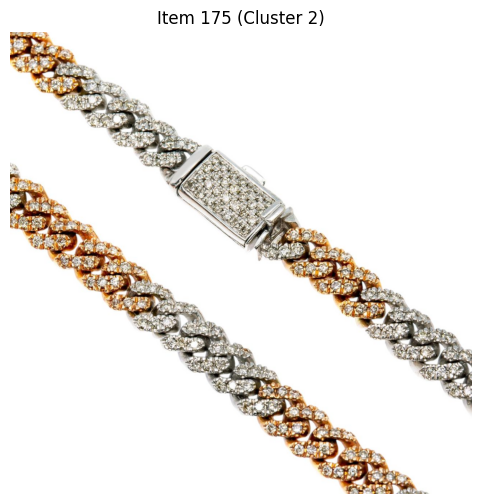

Description: Bracelet, Bracelet Body Metal, Two Tone 14K White and Rose Gold

--- Recommendation #3 (Score: 3.90) ---


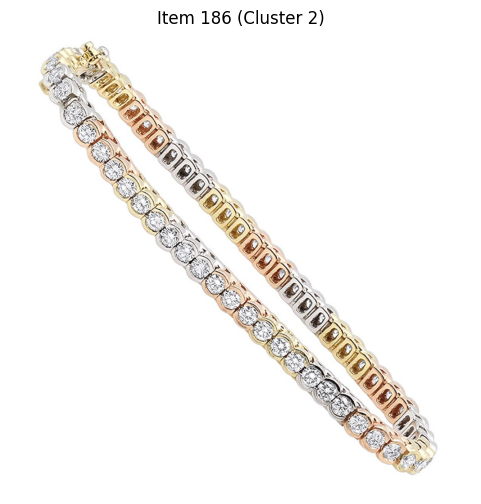

Description: Bracelet, Bracelet Body Metal, Two Tone 14K White and Yellow Gold

--- Recommendation #4 (Score: 3.90) ---


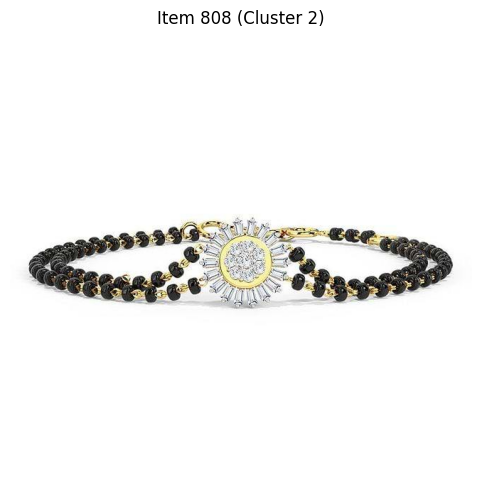

Description: Bracelet, Bracelet Gem Setting, Cluster

--- Recommendation #5 (Score: 3.89) ---


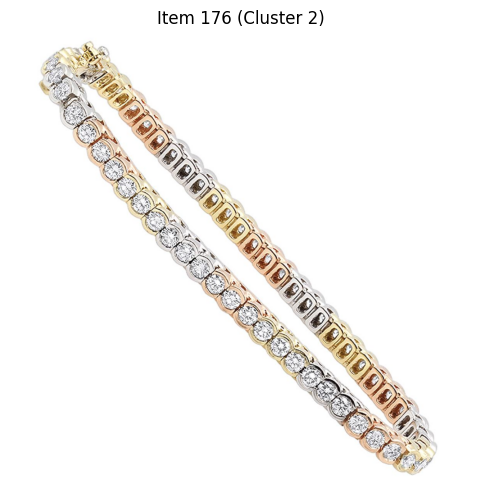

Description: Bracelet, Bracelet Body Metal, Two Tone 14K White and Rose Gold


In [ ]:
# 5. Simulate yourself interacting with the recommender
my_user_id = "me"  # Your unique identifier

# First, browse and rate some jewelry
rated_items = interactive_jewelry_rating(recommender, original_df, my_user_id=my_user_id)

def display_my_recommendations(recommender, original_df, my_user_id="me", top_n=5):
    """Display personalized recommendations"""
    # Get recommendations
    rec_indices, rec_scores = recommender.recommend_for_user(my_user_id, top_n=top_n)

    print(f"\n{'='*50}")
    print(f"TOP {top_n} RECOMMENDATIONS FOR YOU")
    print(f"{'='*50}\n")

    # Display each recommendation
    for i, (idx, score) in enumerate(zip(rec_indices, rec_scores)):
        print(f"\n--- Recommendation #{i+1} (Score: {score:.2f}) ---")

        # Display the item
        try:
            plt.figure(figsize=(6, 6))
            byte_data = original_df.iloc[idx]['file_name']['bytes']
            img = decode_bytes_to_image(byte_data)
            plt.imshow(img)
            plt.title(f"Item {idx} (Cluster {recommender.cluster_assignments[idx]})")
            plt.axis('off')
            plt.show()

            # Display description if available
            if 'text' in original_df.columns:
                print(f"Description: {original_df.iloc[idx]['text']}")
        except Exception as e:
            print(f"Error displaying item: {e}")

    return rec_indices, rec_scores

# Display your personalized recommendations
rec_indices, rec_scores = display_my_recommendations(recommender, original_df, my_user_id=my_user_id)